<a href="https://colab.research.google.com/github/tamayodb/CCMACLRL_EXERCISES_COM222ML/blob/main/EXERCISE8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [ ]:
!pip install numpy opencv-python scikit-learn

## Import libraries

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display one raw image directly from your drive

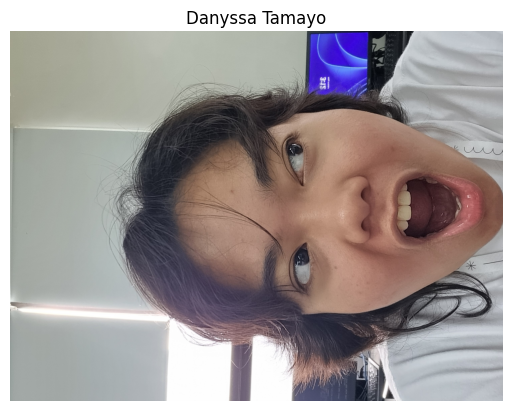

In [ ]:
image_path = '/content/drive/My Drive/Images/Train/Tamayo/20241011_151259.jpg'

image = Image.open(image_path)
plt.imshow(image)
plt.title("Danyssa Tamayo")
plt.axis('off')
plt.show()

## Load the images from your drive and apply preprocessing to your raw images

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [ ]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

In [ ]:
images.shape

(150, 10000)

In [ ]:
labels.shape

(150,)

In [ ]:
labels

array(['Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo', 'Tamayo',
       'Tamayo', 'Tamayo', 'Estrada', 'Estrada', 'Estrada', 'Estrada',
       'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada',
       'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada',
       'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada',
       'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada',
       'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada', 'Estrada',
       'Estrada', 'Estrada',

## Display one pre-processed image from the training set

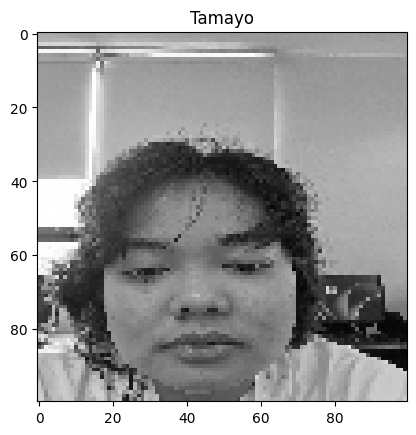

In [ ]:
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

## Display ten pre-processed images from the training set

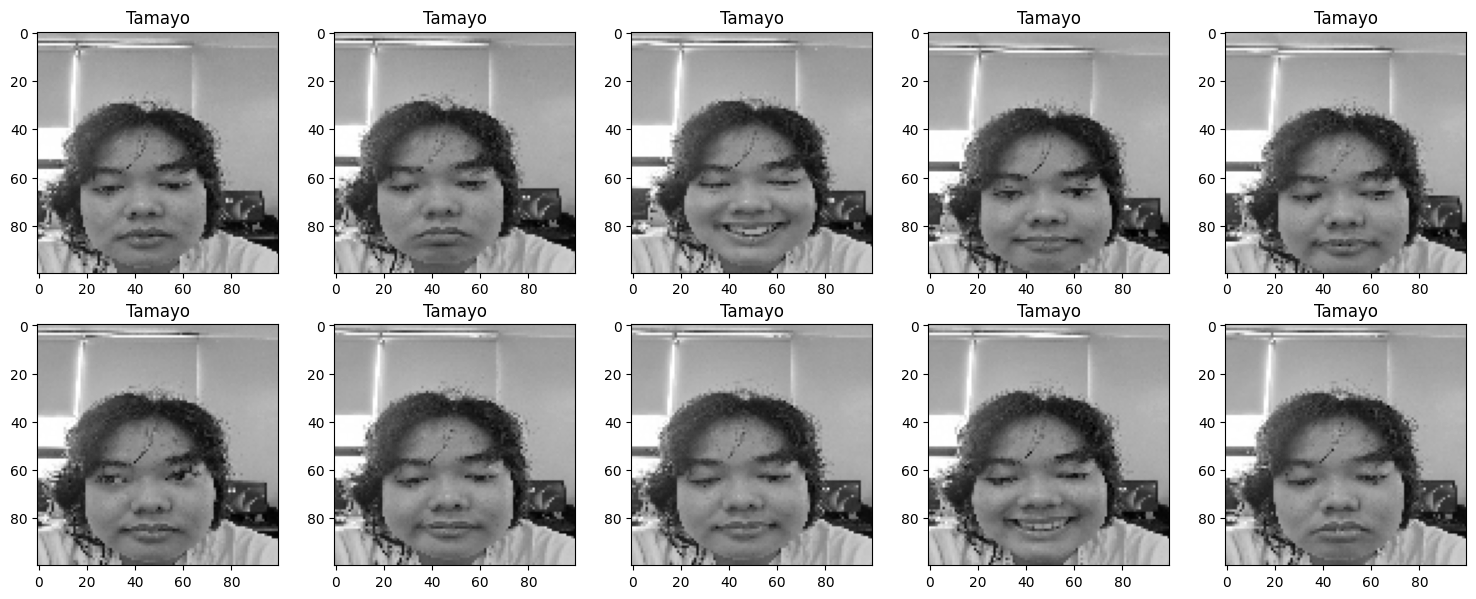

In [ ]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split your data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=0)

## Train your SVM model

In [ ]:
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.78%


## Test your model using images not in your training set

In [ ]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Test one image of yourself

Predicted label: ['Tamayo']


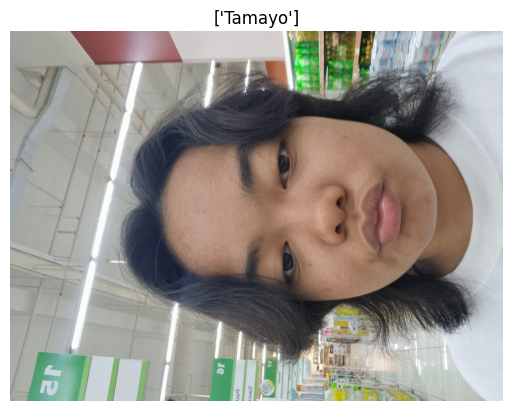

In [ ]:
img_path = '/content/drive/My Drive/Images/Test/20240810_164251.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)

image_of_yourself = Image.open(img_path)
plt.imshow(image_of_yourself)
plt.title(result)
plt.axis('off')
plt.show()

Test one image of your partner

Predicted label: ['Estrada']


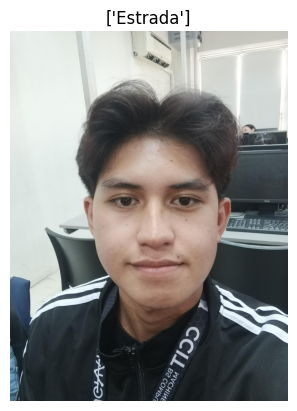

In [ ]:
img_path = '/content/drive/My Drive/Images/Test/Media.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)

image_of_yourself = Image.open(img_path)
plt.imshow(image_of_yourself)
plt.title(result)
plt.axis('off')
plt.show()

Predicted label: ['DeLuna']


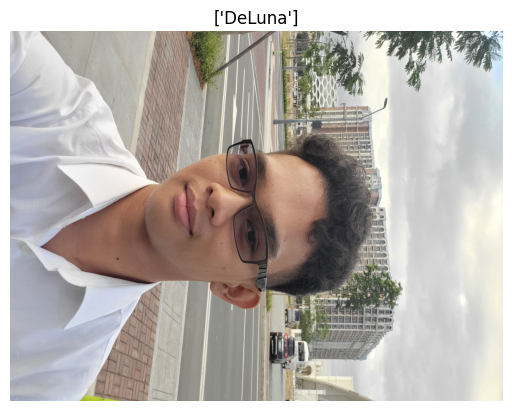

In [ ]:
img_path = '/content/drive/My Drive/Images/Test/Copy of 20240214_165554.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)

image_of_yourself = Image.open(img_path)
plt.imshow(image_of_yourself)
plt.title(result)
plt.axis('off')
plt.show()

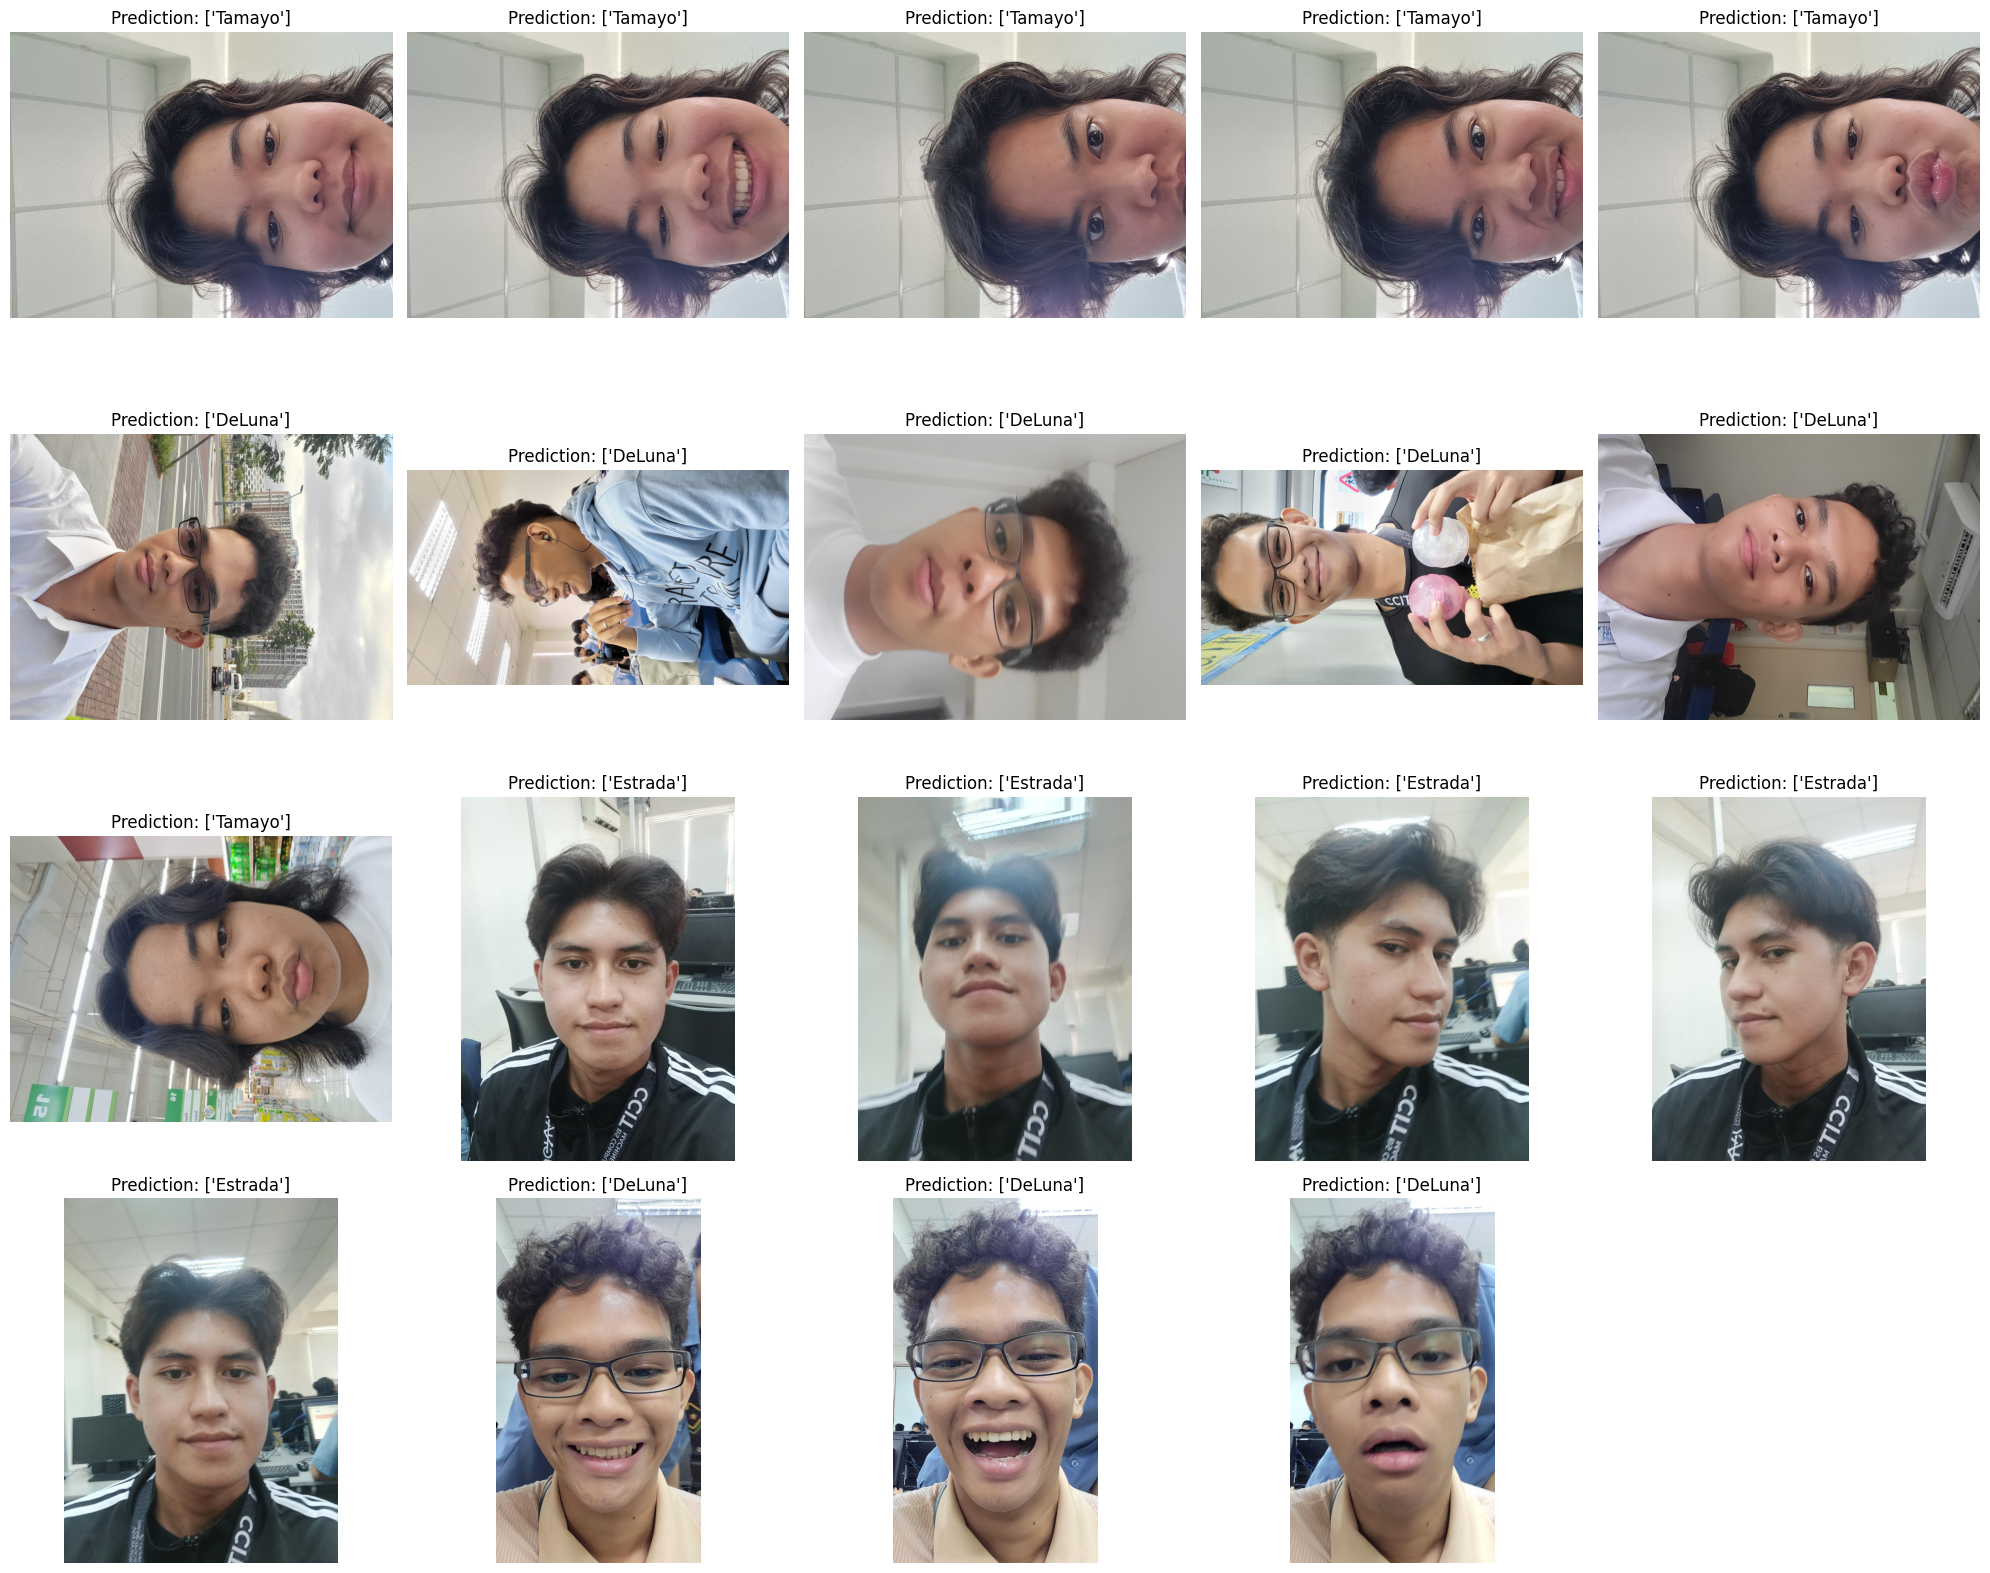

In [136]:
# Path to the folder containing images
folder_path = '/content/drive/My Drive/Images/Test/'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Number of columns and initial figure settings
num_columns = 5
num_images = len(image_files)
num_rows = (num_images + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Create a figure to hold the subplots
plt.figure(figsize=(20, num_rows * 4))  # Adjust the figure size to fit the grid

# Loop through each image file and display it in a grid
for i, img_file in enumerate(image_files):
    # Full path to the image
    img_path = os.path.join(folder_path, img_file)

    # Predict the label for the image (assuming you have a predict_image function)
    result = predict_image(img_path, model)

    # Load the image
    image_of_yourself = Image.open(img_path)

    # Create a subplot for each image
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image_of_yourself)
    plt.title(f'Prediction: {result}')
    plt.axis('off')  # Hide the axis

# Display all the subplots
plt.tight_layout()
plt.show()
